# Explore here

In [3]:
import pandas as pd

# Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
data = pd.read_csv(url)

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Seleccionar las columnas relevantes
X = data[['Latitude', 'Longitude', 'MedInc']]

X.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [6]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en train y test
train_data, test_data = train_test_split(X, test_size=0.2, random_state=42)

2: Construir un K-Means 

In [8]:
from sklearn.cluster import KMeans

# Entrenar el modelo K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(train_data)

KMeans(n_clusters=6, random_state=42)

In [9]:
# Añadir la columna 'cluster' al conjunto de datos de entrenamiento
train_data['cluster'] = kmeans.labels_
train_data.head()

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


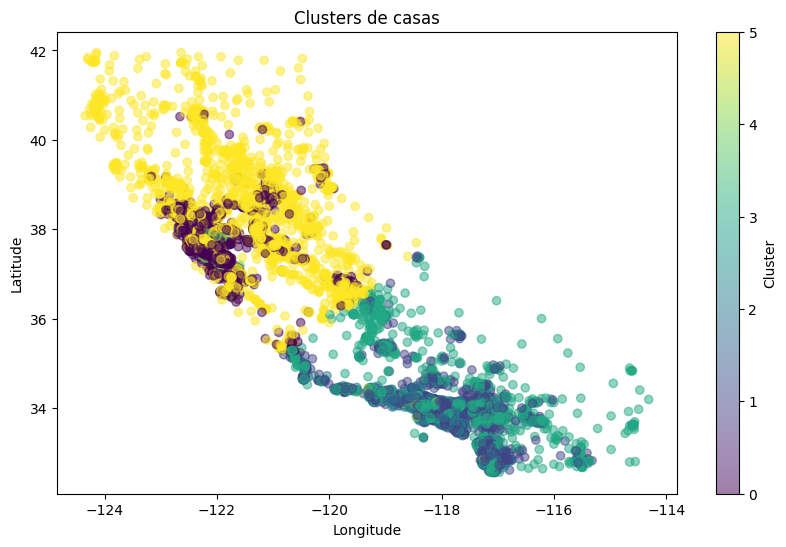

In [11]:
import matplotlib.pyplot as plt

# Mostrar Grafico los clusters
plt.figure(figsize=(10, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], c=train_data['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de casas')
plt.colorbar(label='Cluster')
plt.show()